# Inductive Miner (Infrequent) Prototyping

### Inductive Miner - Base

In [54]:
%reload_ext autoreload
%autoreload 2

from practical.ProcessMining.group1.task3.inductiveminer import InductiveMiner
from practical.ProcessMining.group1.task3.inductiveminer_infrequent import InductiveMinerInfrequent
from practical.ProcessMining.group1.shared.utils import read_txt_test_logs
from practical.ProcessMining.group1.shared.visualizer import Visualizer
import pandas as pd
from IPython.display import Image, display
from pm4py import format_dataframe
from pm4py.visualization.process_tree import visualizer as pt_vis
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
import tempfile

def visualize_pm4py_process_tree(log):
    if isinstance(log, str):
        event_log = pd.read_csv('../shared/example_files/helpdesk_log.csv', sep=';')
        event_log = format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    else:
        data = [{'case:concept:name': idx, 'concept:name': activity, 'time:timestamp': idx}
                for idx, trace in enumerate(log)
                for activity in trace]
        df = pd.DataFrame(data)
        event_log = log_converter.apply(df)
    process_tree = inductive_miner.apply(event_log, variant=inductive_miner.Variants.IM)
    gviz_tree = pt_vis.apply(process_tree)
    
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_file:
        pt_vis.save(gviz_tree, temp_file.name)
        display(Image(filename=temp_file.name))
    

def visualize_custom_miner(miner):
    miner.run()
    print(miner)
    processtree = miner.visualize_process_tree()
    Visualizer.display(processtree)
    petrinet = miner.build_and_visualize_petrinet()
    Visualizer.display(petrinet)

def run(log):
    miner = InductiveMiner(log)
    # PM4Py visualization
    # visualize_pm4py_process_tree(log)
    
    # Custom implementation visualization
    print("=== INDUCTIVE BASE ===")
    visualize_custom_miner(miner)

def run_infrequent(log, treshhold=0.3):
    miner = InductiveMinerInfrequent(log, treshhold)
    print("=== INDUCTIVE INFR ===")
    visualize_custom_miner(miner)

Sequence Logs

=== INDUCTIVE BASE ===
→(a, b, c, d, e, f, g)


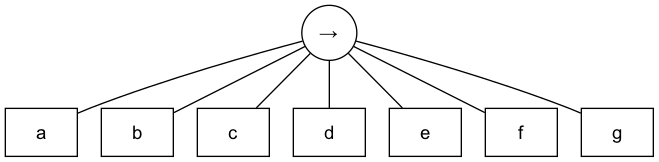

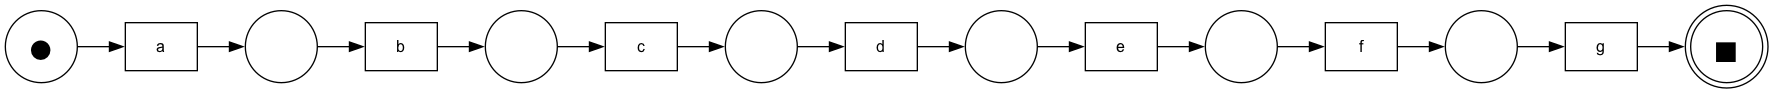

In [55]:
log = [('a', 'b', 'c', 'd', 'e', 'f', 'g')]
run(log)

XOR Logs

=== INDUCTIVE BASE ===
×(→(a, c, ×(i, j)), →(d, e, ×(k, 𝜏), h, ×(f, 𝜏)))


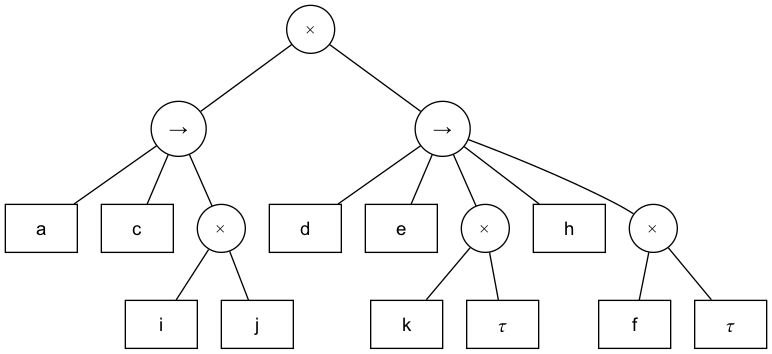

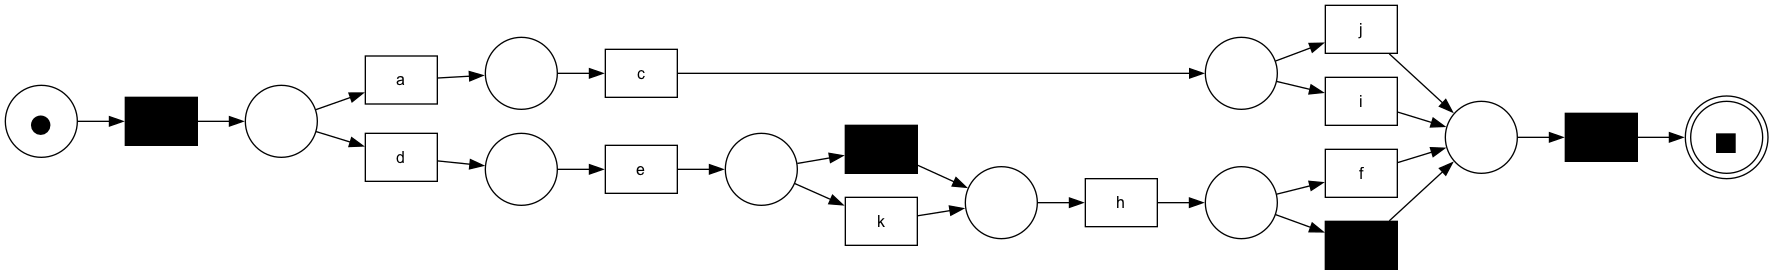

In [56]:
log = [('a', 'c', 'i'), ('d', 'e', 'k' ,'h'), ('a', 'c', 'j'), ('d', 'e', 'h', 'f')]
run(log)

Mixed Logs

=== INDUCTIVE BASE ===
∧(↺(b, →(c, d)), e)


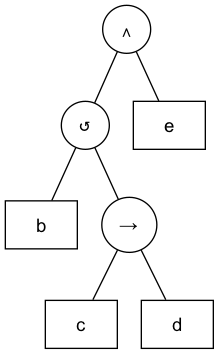

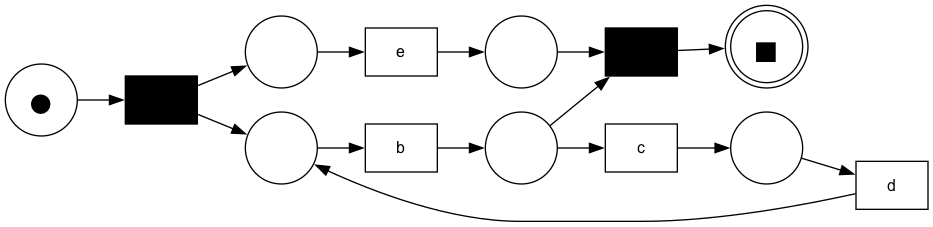

In [57]:
## Parallel Log
log = [('b', 'e'),
       ('b', 'e', 'c', 'd', 'b'),
       ('b', 'c', 'e', 'd', 'b'),
       ('b', 'c', 'd', 'e', 'b'),
       ('e', 'b', 'c', 'd', 'b')]
run(log)

=== INDUCTIVE BASE ===
→(a, ↺(∧(b, c), →(e, f)), d)


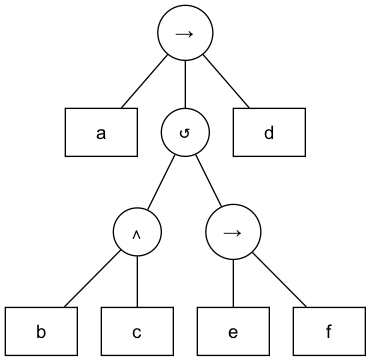

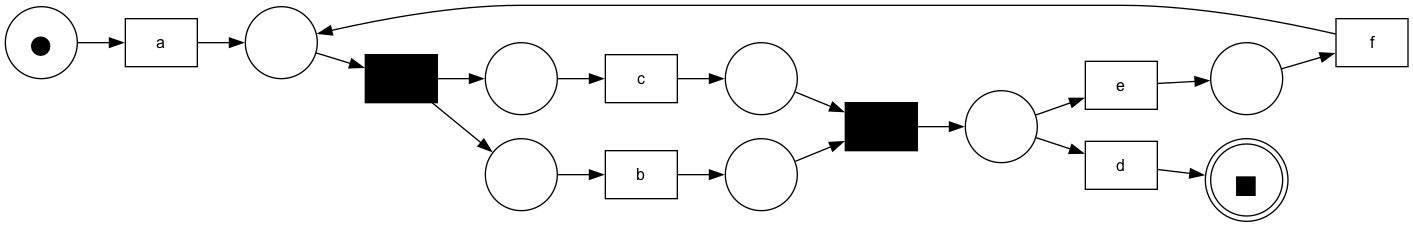

In [58]:
log = [('a', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'c', 'b', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b', 'd')]
run(log)

=== INDUCTIVE BASE ===
↺(∧(b, c), →(e, f))


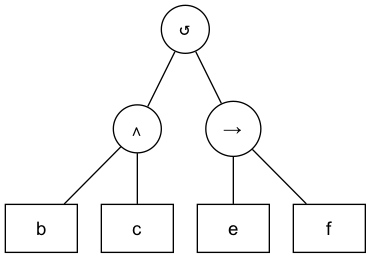

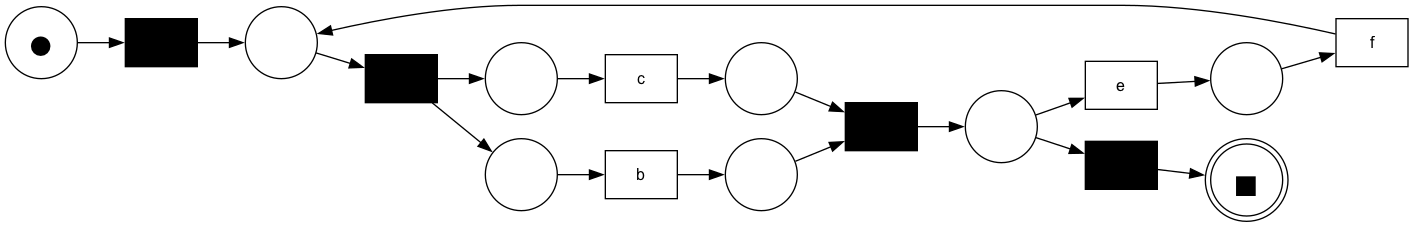

In [59]:
log = [('b', 'c'),
 ('c', 'b'),
 ('b', 'c', 'e', 'f', 'b', 'c'),
 ('c', 'b', 'e', 'f', 'b', 'c'),
 ('b', 'c', 'e', 'f', 'c', 'b'),
 ('c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b')]
run(log)

Tau Logs

=== INDUCTIVE BASE ===
↺(𝜏, a)


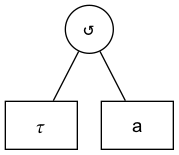

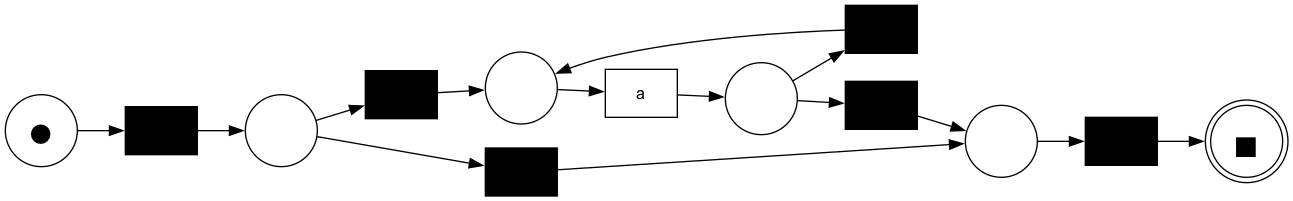

In [60]:
log = [('',), ('a',), ('a', 'a')]
run(log)

=== INDUCTIVE BASE ===
↺(𝜏, a, b, c, d)


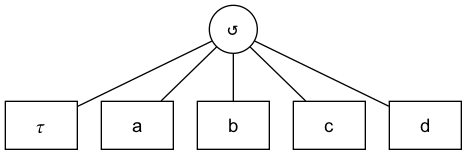

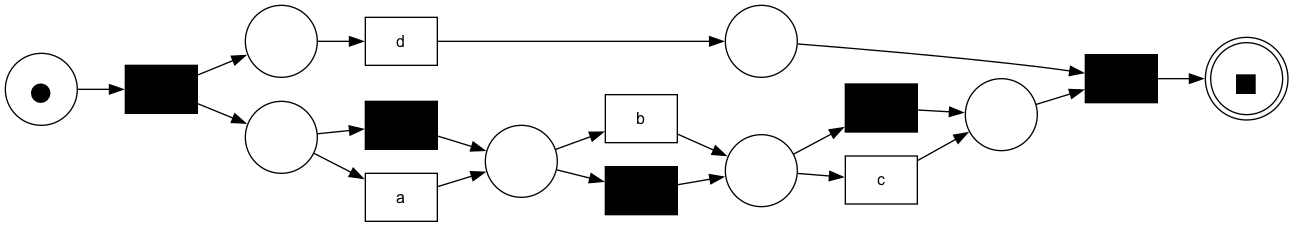

In [61]:
log = [('a', 'b', 'c', 'd'), ('d', 'a', 'b'), ('a', 'd', 'c'), ('b', 'c', 'd',)]
run(log)

In [62]:
log = [('a', 'c', 'd', 'e', 'b'),
       ('a', 'b', 'a', 'e', 'd', 'c'),
       ('a', 'e', 'c', 'b', 'd'),
       ('a', 'd', 'b', 'c', 'e')]

#run_freq(log, 0.3)
miner = InductiveMinerInfrequent(log, 0.3)
miner.run()
print(miner)

↺(𝜏, a, b, c, d, e)


=== INDUCTIVE BASE ===
a


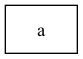

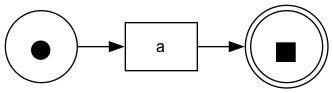

In [63]:
run([('a',), ('a',), ('a',)])

=== INDUCTIVE BASE ===
×(a, 𝜏)


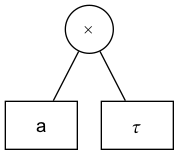

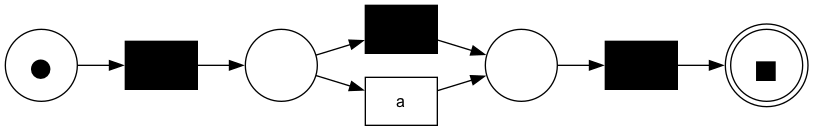

In [64]:
run([('',), ('a',), ('a',)])

=== INDUCTIVE BASE ===
↺(a, 𝜏)


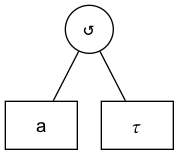

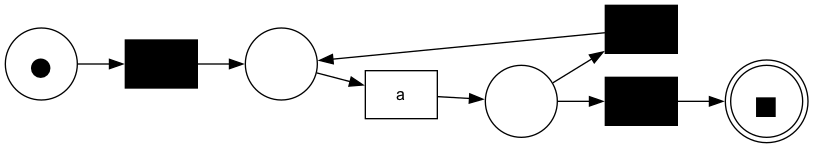

In [65]:
run([('a',), ('a', 'a'), ('a', 'a', 'a')])

=== INDUCTIVE BASE ===
↺(𝜏, a)


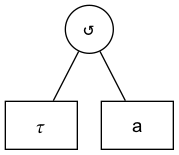

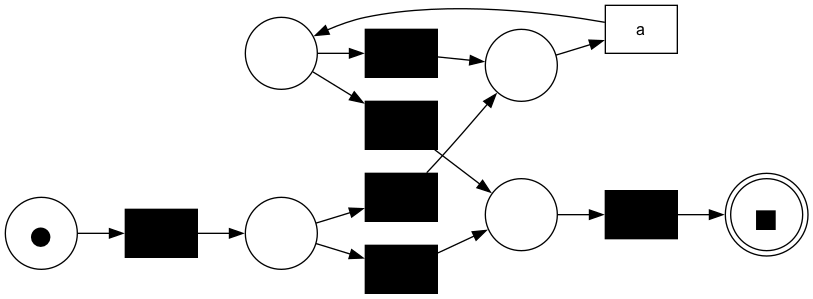

In [66]:
run([('',), ('a',), ('a', 'a')])

# Test with simple event logs

### Inductive Miner - Comparison base vs infrequent

======== L1 =========

=== INDUCTIVE BASE ===
→(a, ×(∧(b, c), e), d)


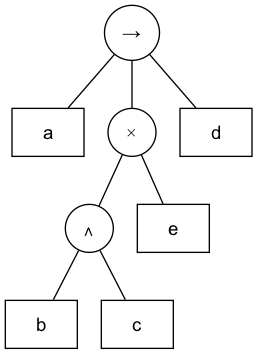

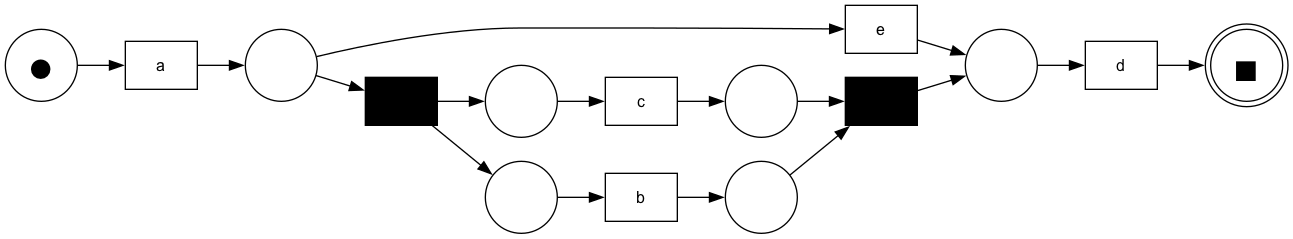

=== INDUCTIVE INFR ===
→(a, ×(∧(b, c), e), d)


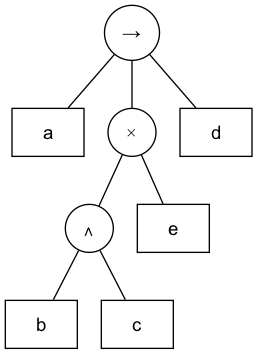

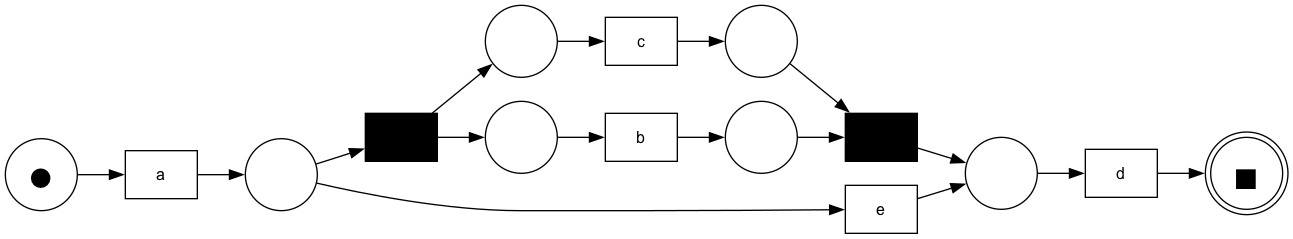

======== L2 =========

=== INDUCTIVE BASE ===
→(a, ↺(∧(b, c), →(e, f)), d)


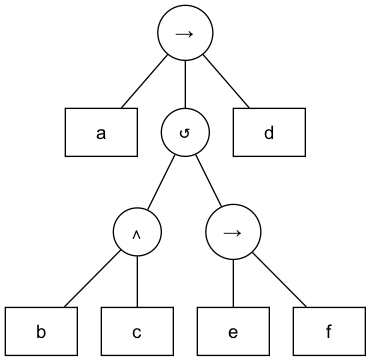

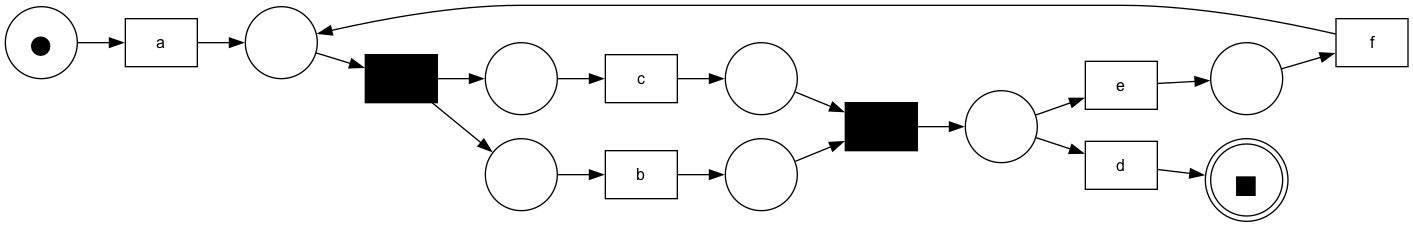

=== INDUCTIVE INFR ===
→(a, ↺(∧(b, c), →(e, f)), d)


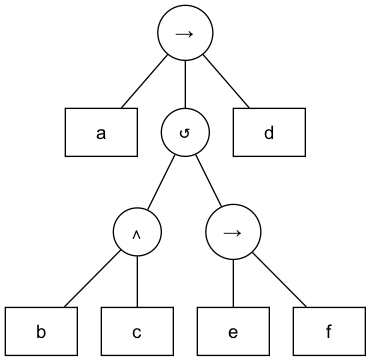

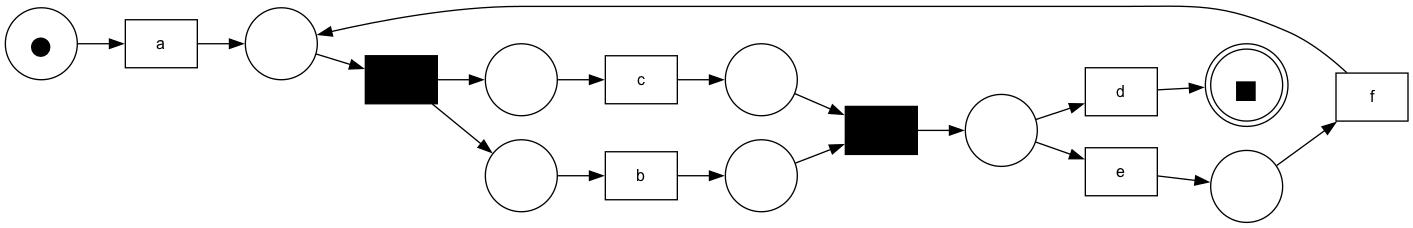

======== L3 =========

=== INDUCTIVE BASE ===
→(a, ↺(→(b, ∧(c, d), e), f), g)


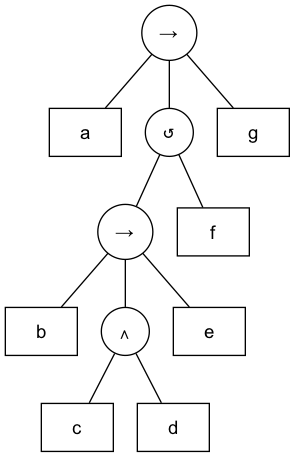

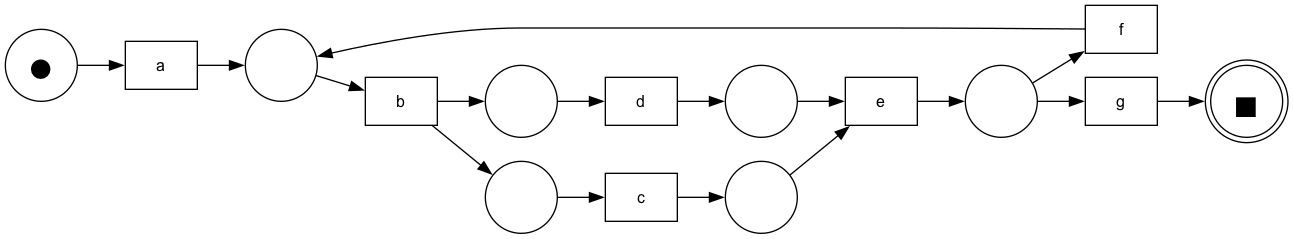

=== INDUCTIVE INFR ===
→(a, ↺(→(b, ∧(c, d), e), f), g)


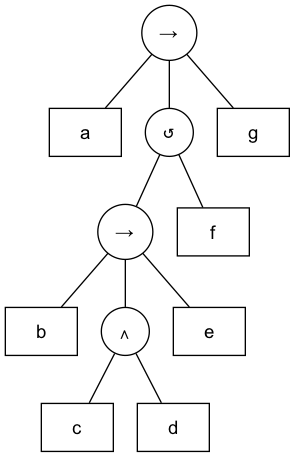

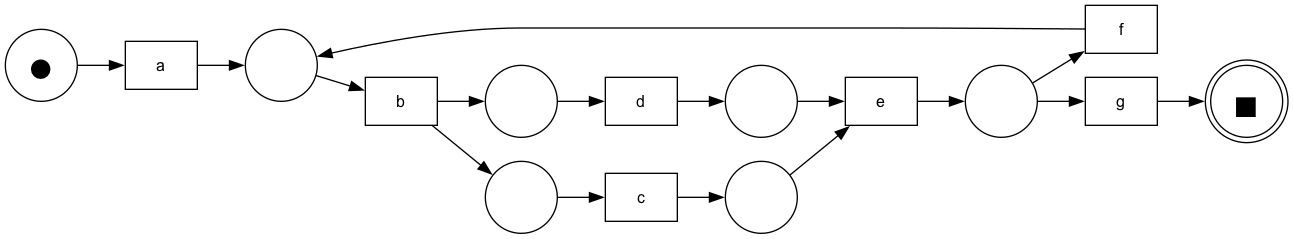

======== L4 =========

=== INDUCTIVE BASE ===
→(×(a, b), c, ×(d, e))


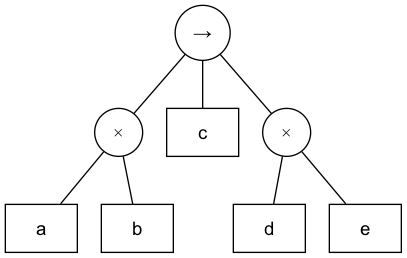

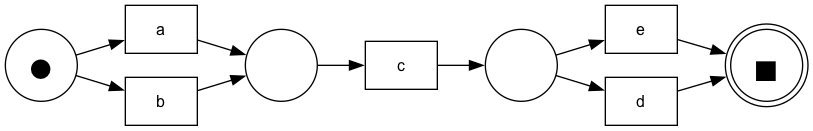

=== INDUCTIVE INFR ===
→(×(a, b), c, ×(d, e))


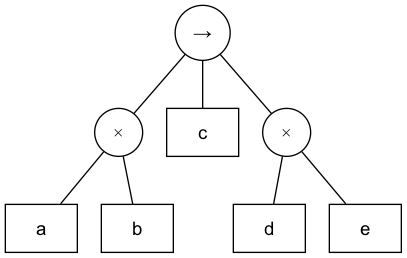

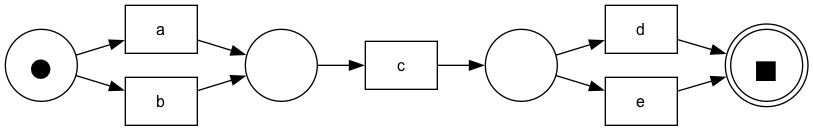

======== L5 =========

=== INDUCTIVE BASE ===
→(a, ∧(↺(b, →(c, d)), e), f)


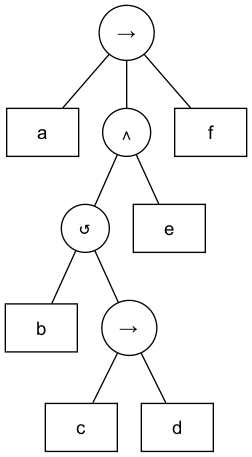

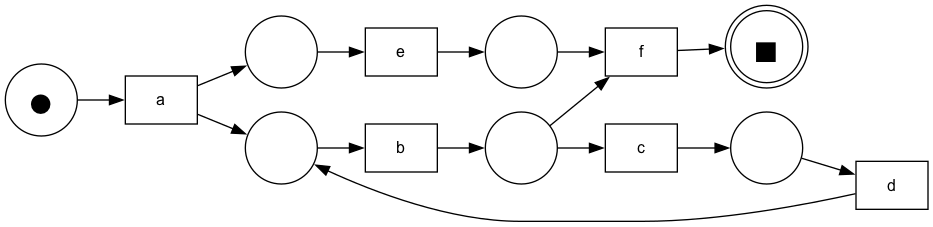

=== INDUCTIVE INFR ===
→(a, ∧(↺(b, →(c, d)), e), f)


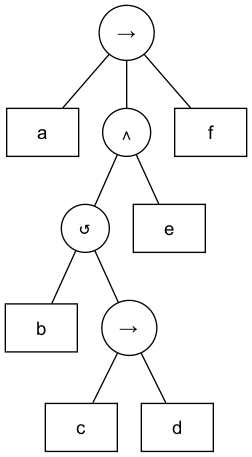

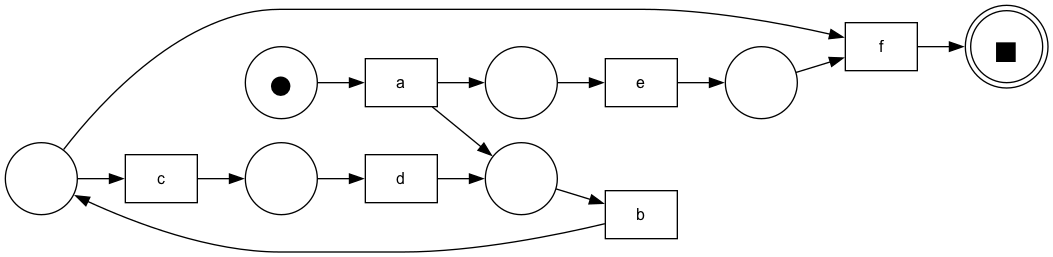

======== L6 =========

=== INDUCTIVE BASE ===
→(×(→(a, ∧(c, e)), →(b, ∧(d, f))), g)


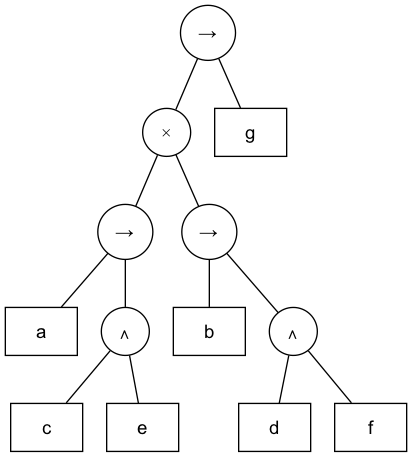

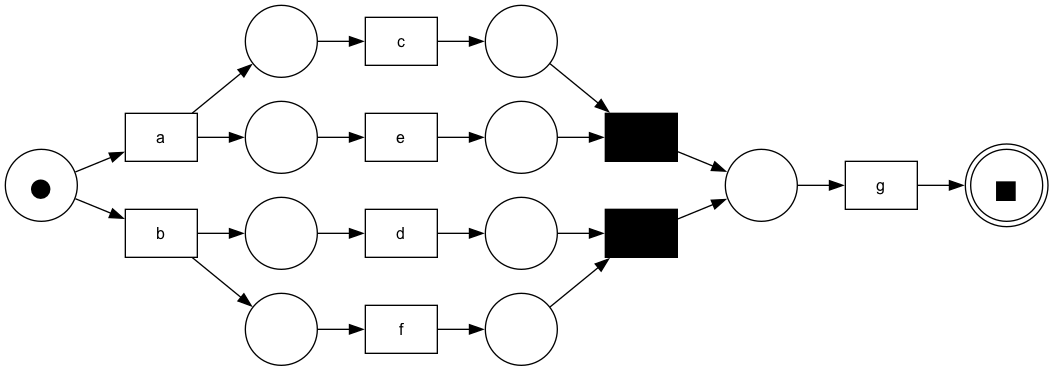

=== INDUCTIVE INFR ===
→(×(→(a, ∧(c, e)), →(b, ∧(d, f))), g)


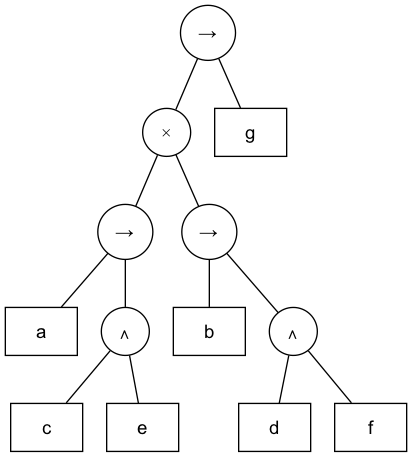

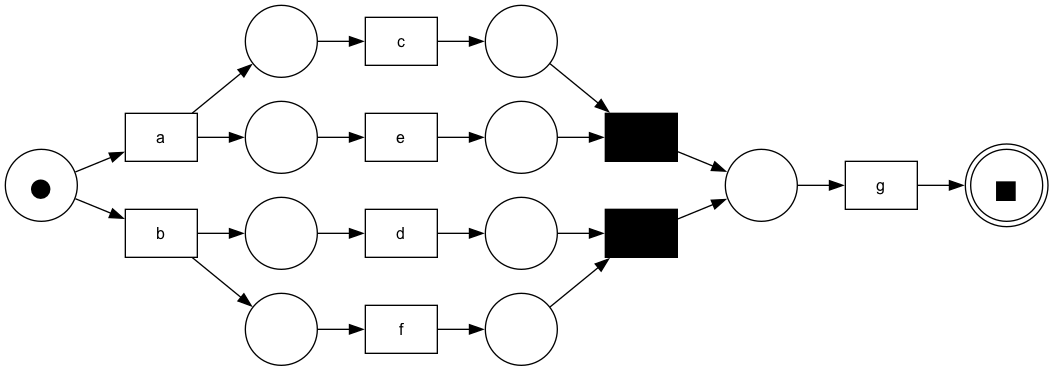

======== L7 =========

=== INDUCTIVE BASE ===
→(a, ↺(𝜏, b), c)


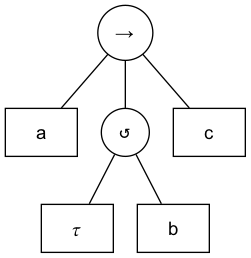

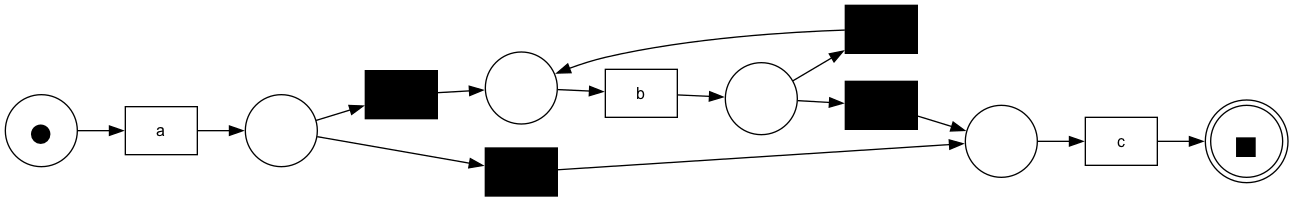

=== INDUCTIVE INFR ===
→(a, ↺(𝜏, b), c)


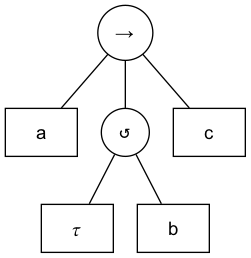

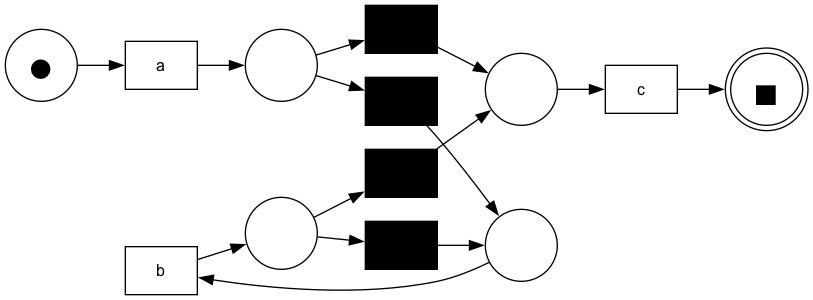

======== L8 =========

=== INDUCTIVE BASE ===
→(a, ↺(b, c), d)


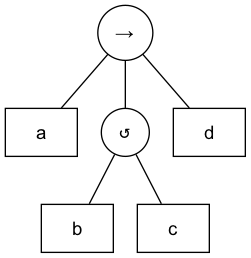

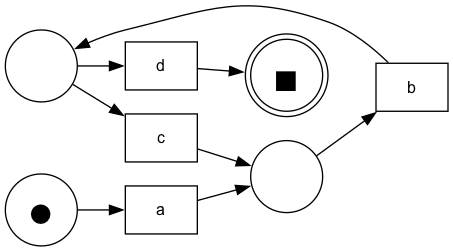

=== INDUCTIVE INFR ===
→(a, ↺(b, c), d)


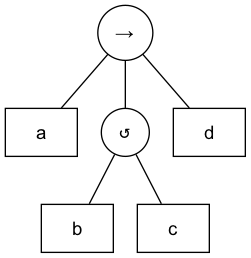

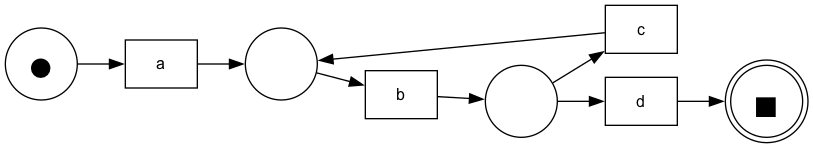

======== L9 =========

=== INDUCTIVE BASE ===
→(×(a, b), c, ×(d, e))


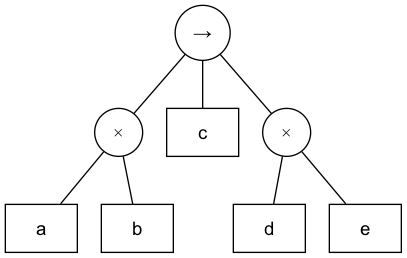

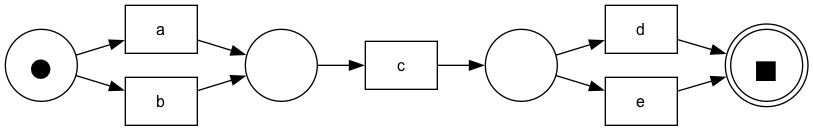

=== INDUCTIVE INFR ===
→(×(a, b), c, ×(d, e))


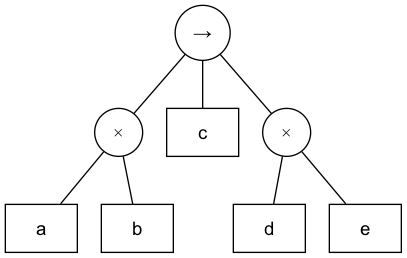

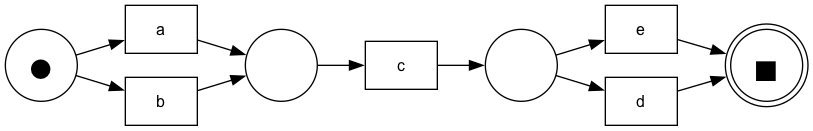

======== L10 =========

=== INDUCTIVE BASE ===
↺(a, 𝜏)


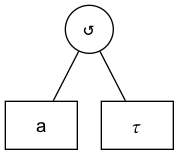

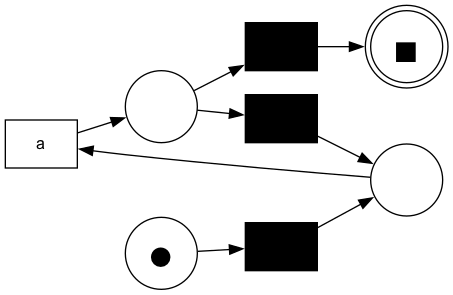

=== INDUCTIVE INFR ===
↺(a, 𝜏)


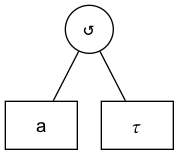

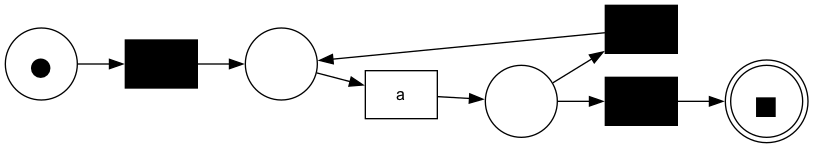

======== L11 =========

=== INDUCTIVE BASE ===
→(a, ×(b, 𝜏), c)


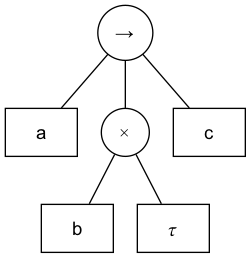

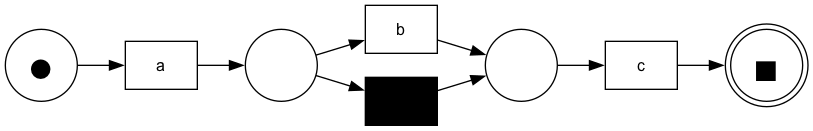

=== INDUCTIVE INFR ===
→(a, ×(b, 𝜏), c)


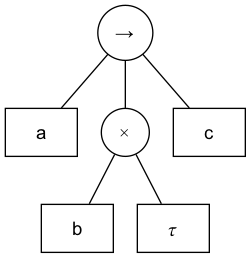

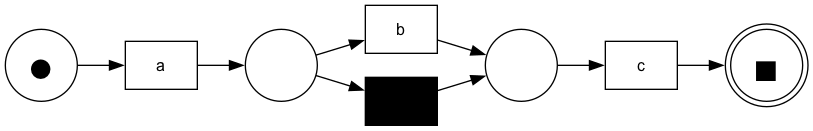

======== L12 =========

=== INDUCTIVE BASE ===
→(×(a, b), c, ×(d, e))


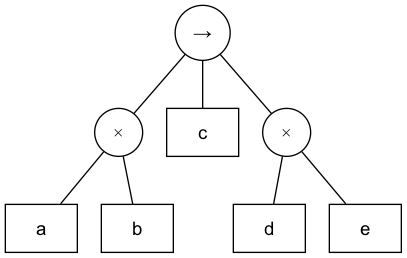

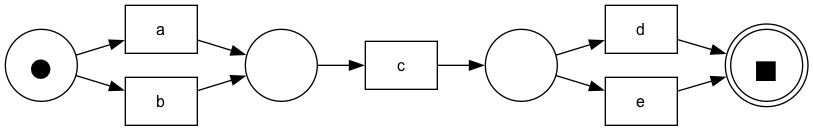

=== INDUCTIVE INFR ===
→(×(a, b), c, ×(d, e))


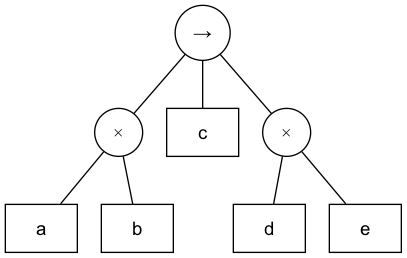

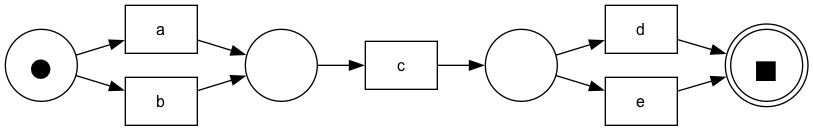

======== L13 =========

=== INDUCTIVE BASE ===
→(a, ∧(b, ↺(𝜏, c, d, e)))


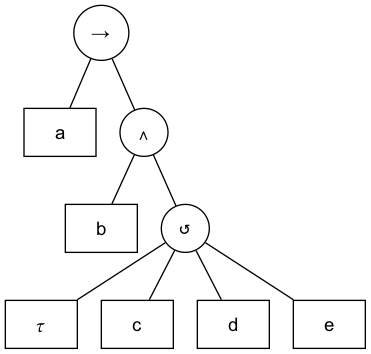

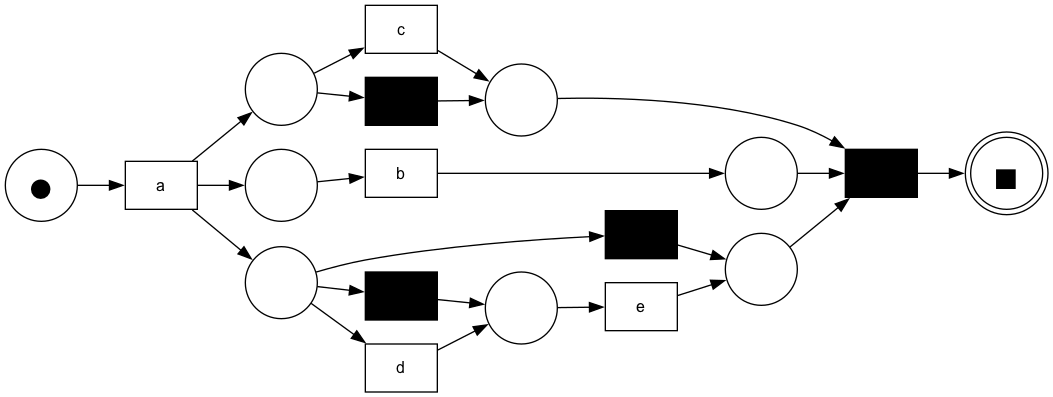

=== INDUCTIVE INFR ===
→(a, ∧(b, ↺(𝜏, c, d, e)))


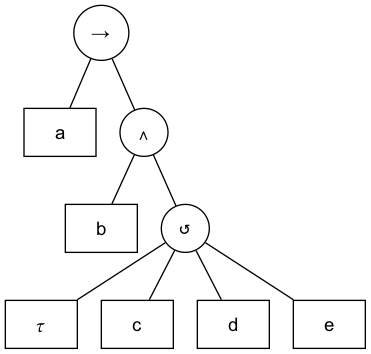

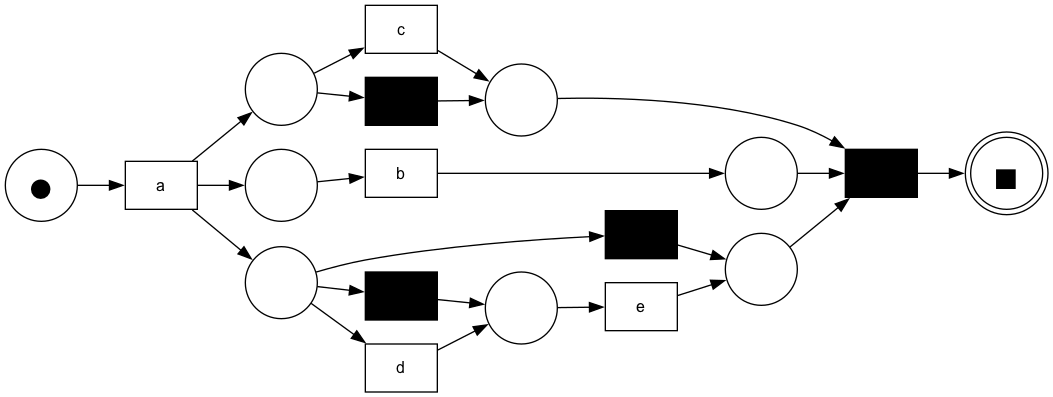

======== L14 =========

=== INDUCTIVE BASE ===
↺(𝜏, a, b, c, d)


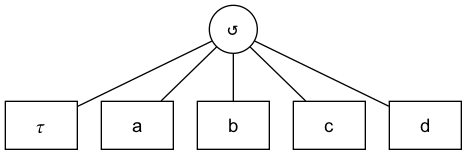

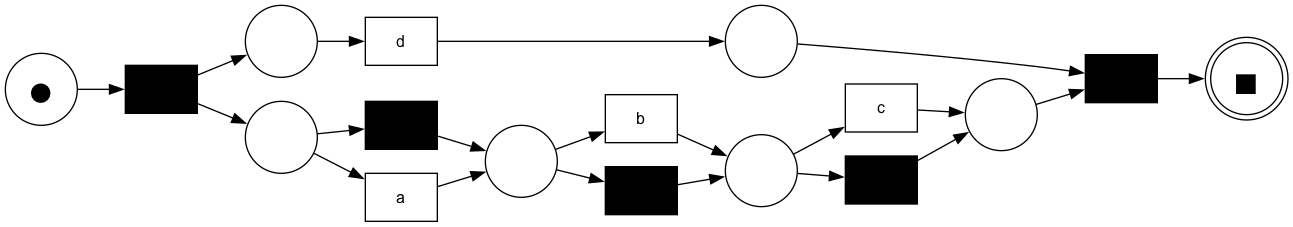

=== INDUCTIVE INFR ===
↺(𝜏, a, b, c, d)


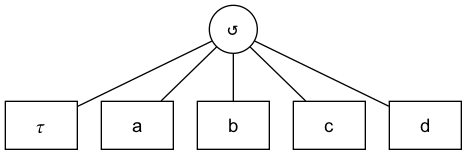

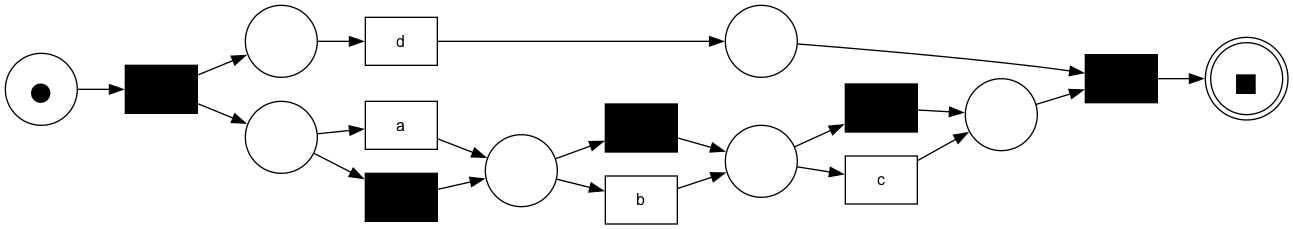

======== L15 =========

=== INDUCTIVE BASE ===
→(×(d, 𝜏), ×(∧(↺(𝜏, a), ×(b, 𝜏)), 𝜏), ×(c, 𝜏))


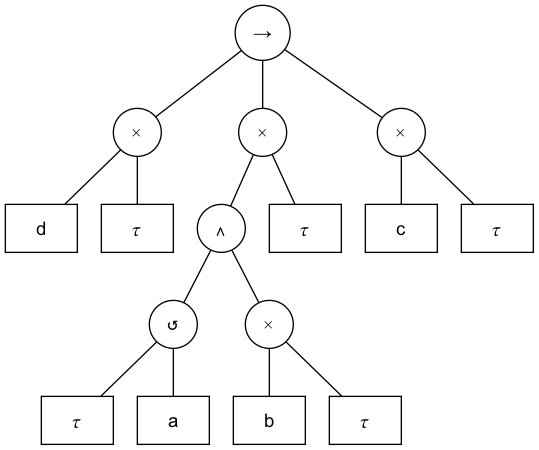

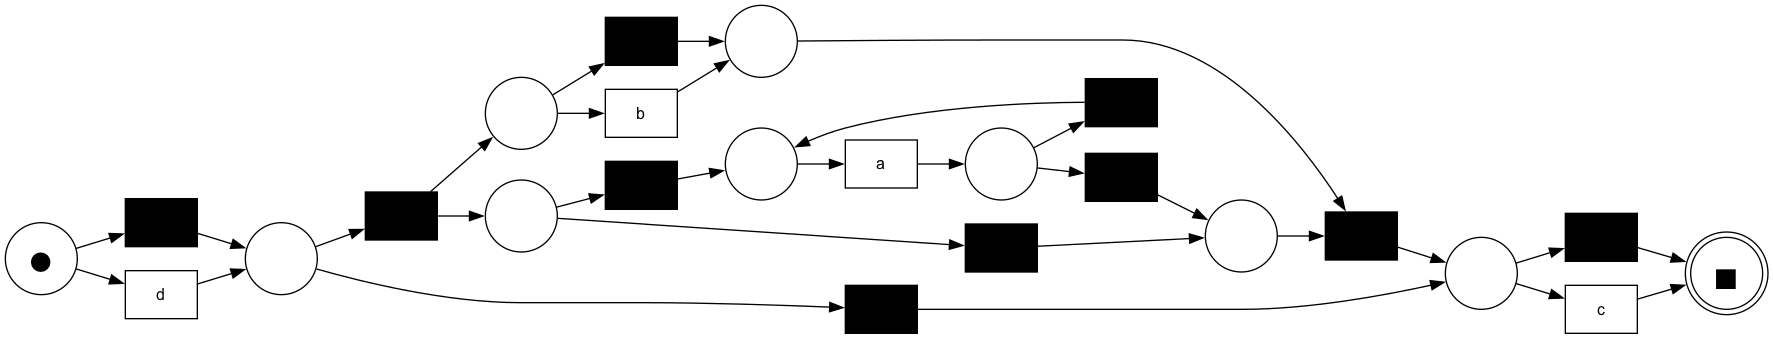

=== INDUCTIVE INFR ===
→(×(d, 𝜏), ×(∧(↺(𝜏, a), ×(b, 𝜏)), 𝜏), ×(c, 𝜏))


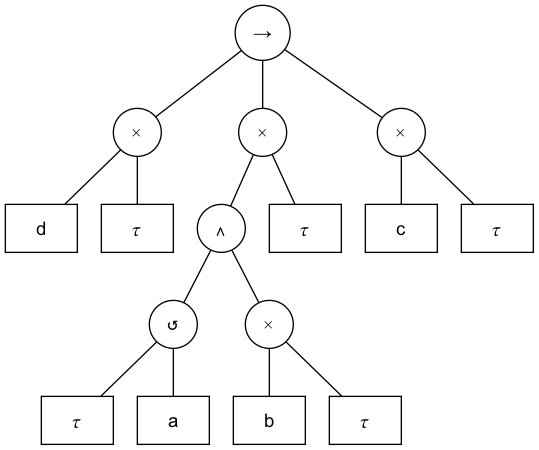

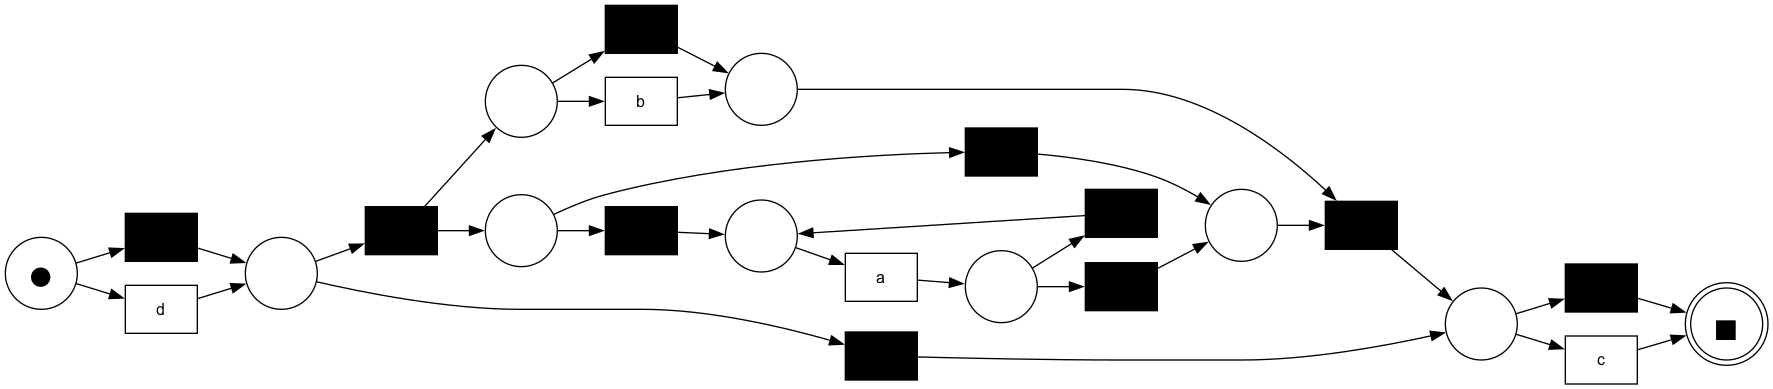

======== L16 =========

=== INDUCTIVE BASE ===
→(a, ×(b, 𝜏), ×(c, 𝜏), d)


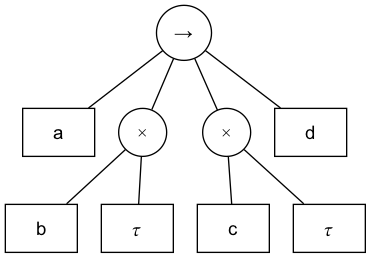

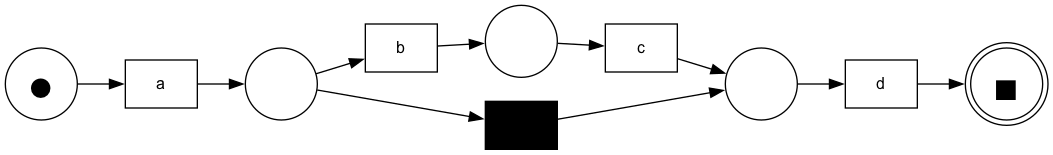

=== INDUCTIVE INFR ===
→(a, ×(b, 𝜏), ×(c, 𝜏), d)


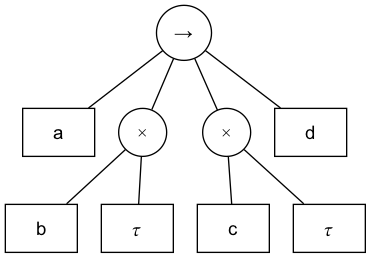

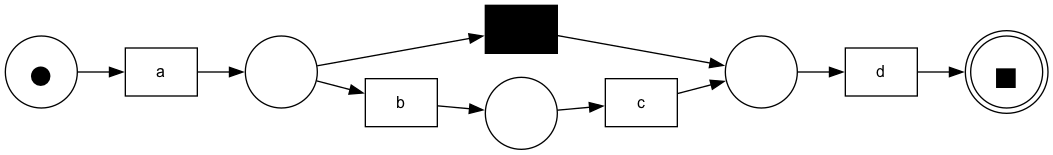

======== L17 =========

=== INDUCTIVE BASE ===
↺(𝜏, a, b, c, d, e)


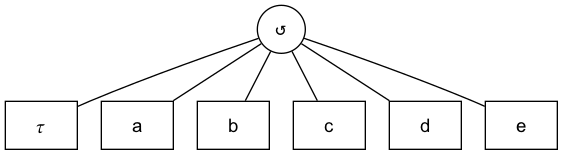

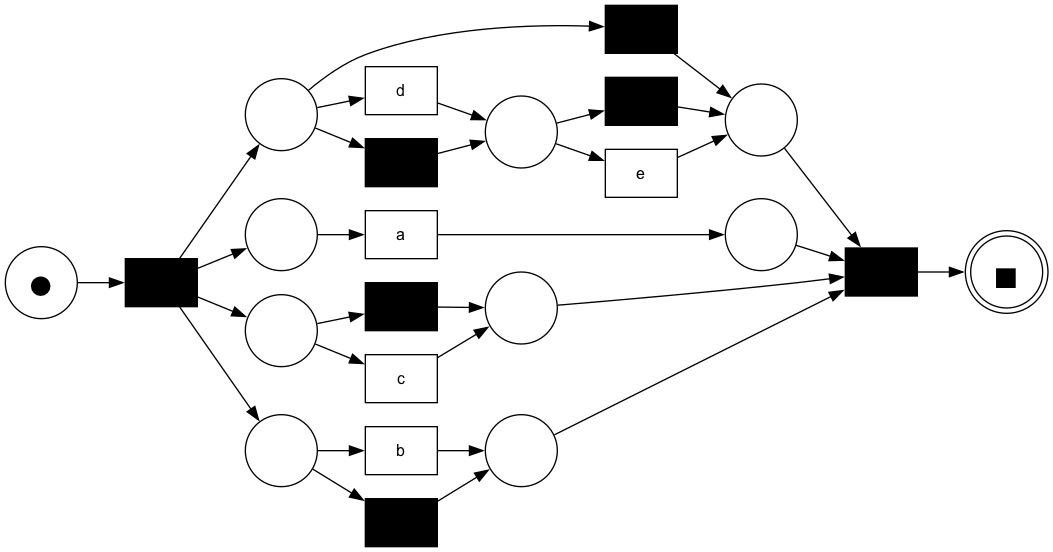

=== INDUCTIVE INFR ===
→(a, ∧(×(b, 𝜏), ↺(𝜏, c, d, e)))


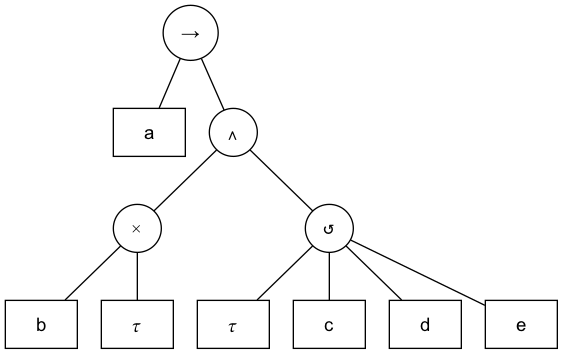

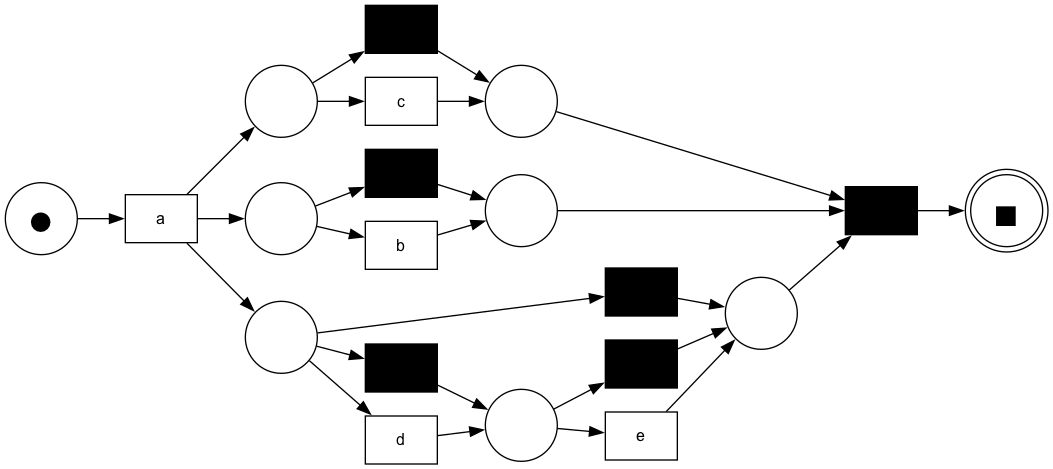

======== L18 =========

=== INDUCTIVE BASE ===
→(a, ∧(b, ×(c, d)), ×(f, 𝜏), ∧(×(e, 𝜏), g), ×(h, 𝜏))


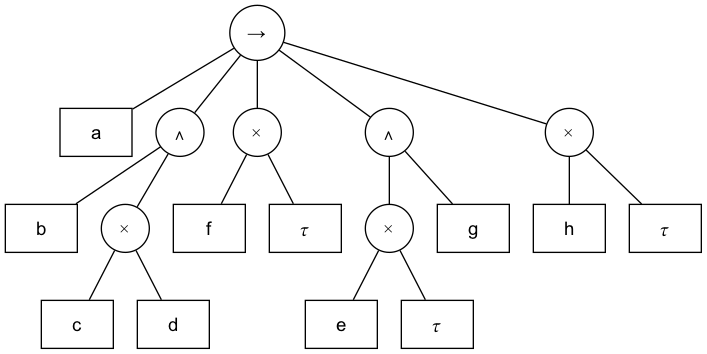

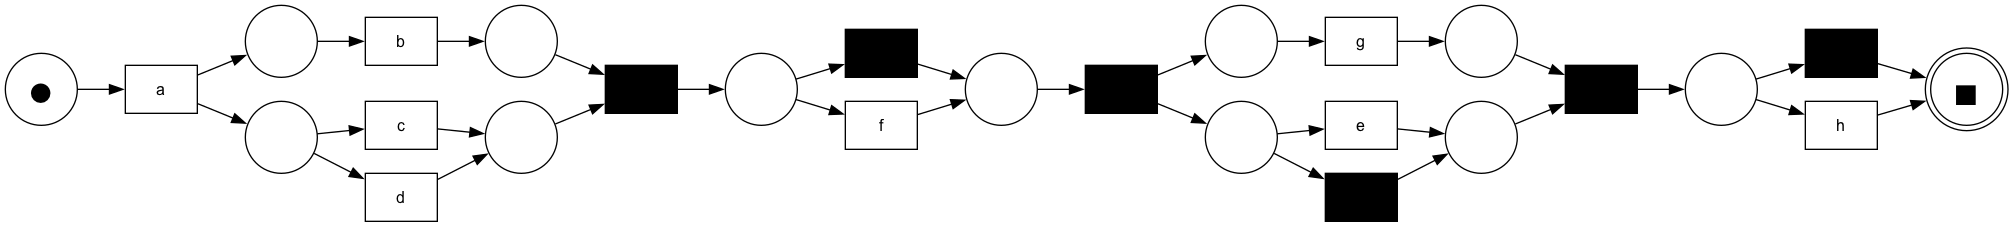

=== INDUCTIVE INFR ===
→(a, ∧(b, ×(c, d)), ×(f, 𝜏), ∧(×(e, 𝜏), g), ×(h, 𝜏))


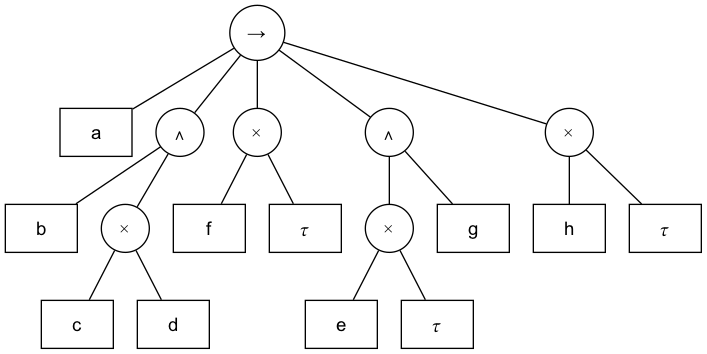

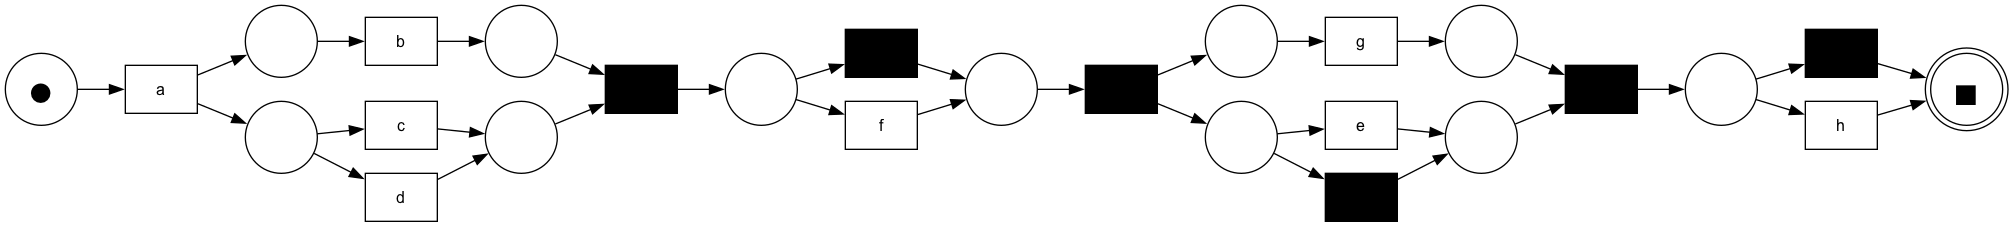

======== L19 =========

=== INDUCTIVE BASE ===
→(a, ∧(b, c), d, ×(f, 𝜏), e)


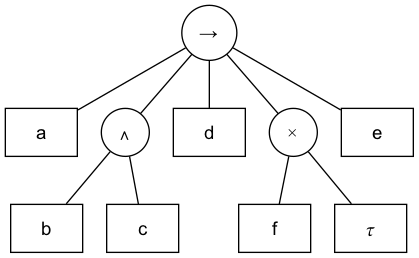

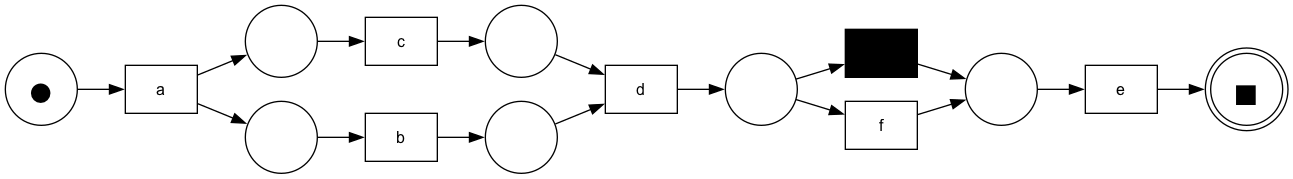

=== INDUCTIVE INFR ===
→(a, ∧(b, c), d, ×(f, 𝜏), e)


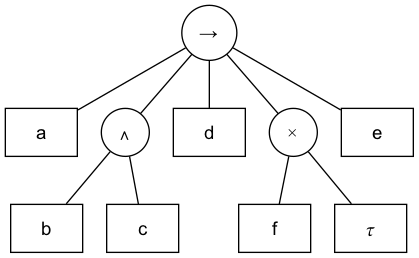

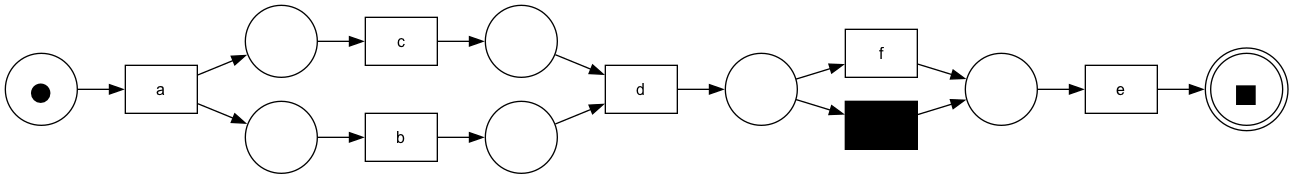

In [67]:
test_logs = read_txt_test_logs("../shared/example_files/simple_event_logs.txt")

for key in test_logs.keys():
    print(f"======== {key} =========\n")
    run(test_logs[key])
    run_infrequent(test_logs[key])

# Test with real event logs

Polato, Mirko (2017): Dataset belonging to the help desk log of an Italian Company. Version 1. 4TU.ResearchData. dataset. https://doi.org/10.4121/uuid:0c60edf1-6f83-4e75-9367-4c63b3e9d5bb

=== INDUCTIVE BASE ===
→(×(Insert ticket, 𝜏), ↺(Assign seriousness, Closed, Create SW anomaly, DUPLICATE, Require upgrade, Resolve SW anomaly, Resolve ticket, Schedule intervention, Take in charge ticket, VERIFIED, Wait, →(RESOLVED, INVALID)))


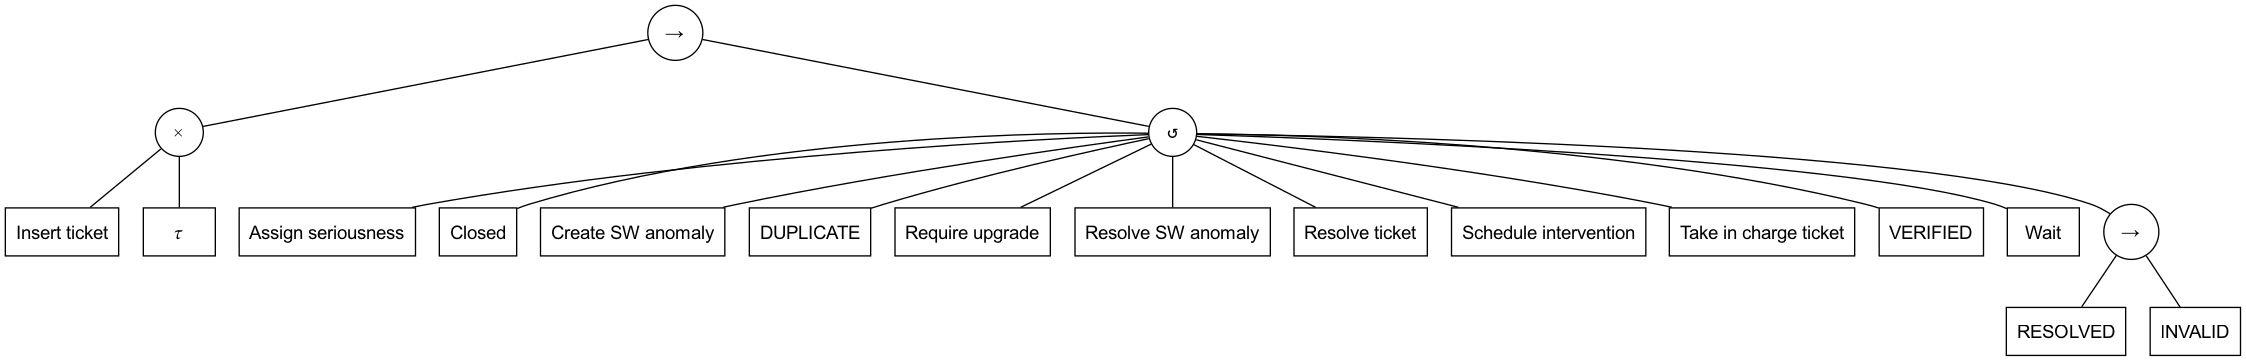

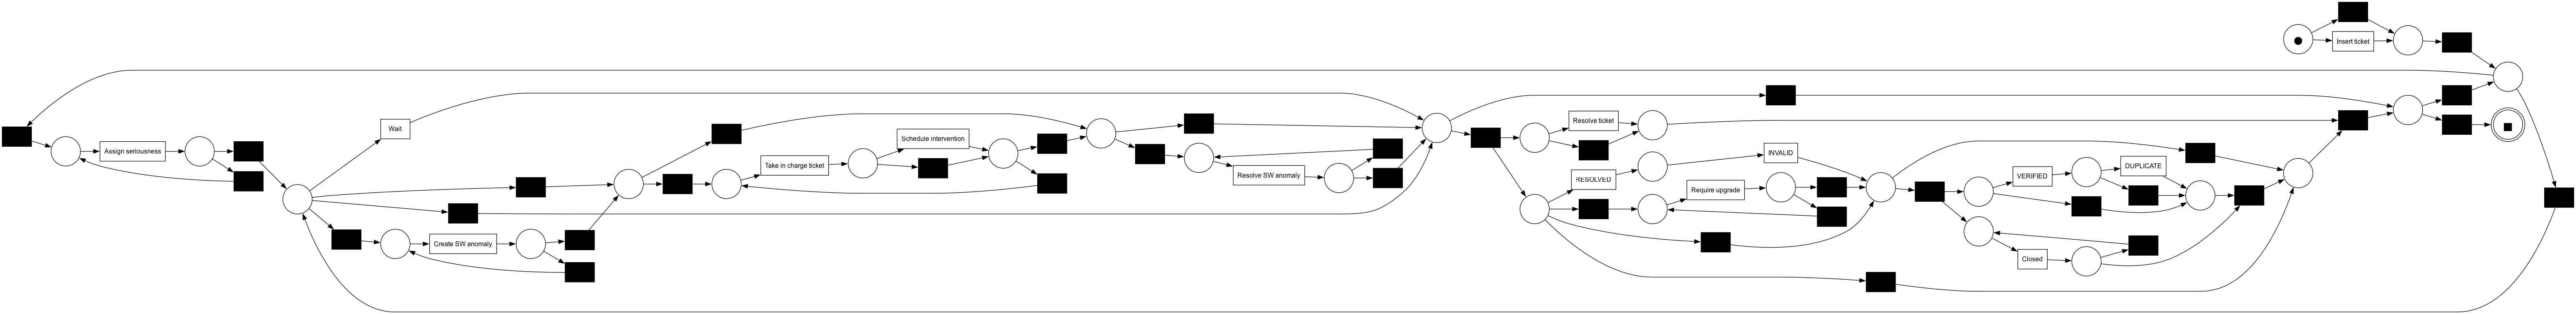

In [68]:
run('../shared/example_files/helpdesk_log.csv')

=== INDUCTIVE INFR ===
→(×(Insert ticket, 𝜏), ↺(Assign seriousness, Closed, Create SW anomaly, DUPLICATE, Require upgrade, Resolve SW anomaly, Resolve ticket, Schedule intervention, Take in charge ticket, VERIFIED, Wait, →(RESOLVED, INVALID)))


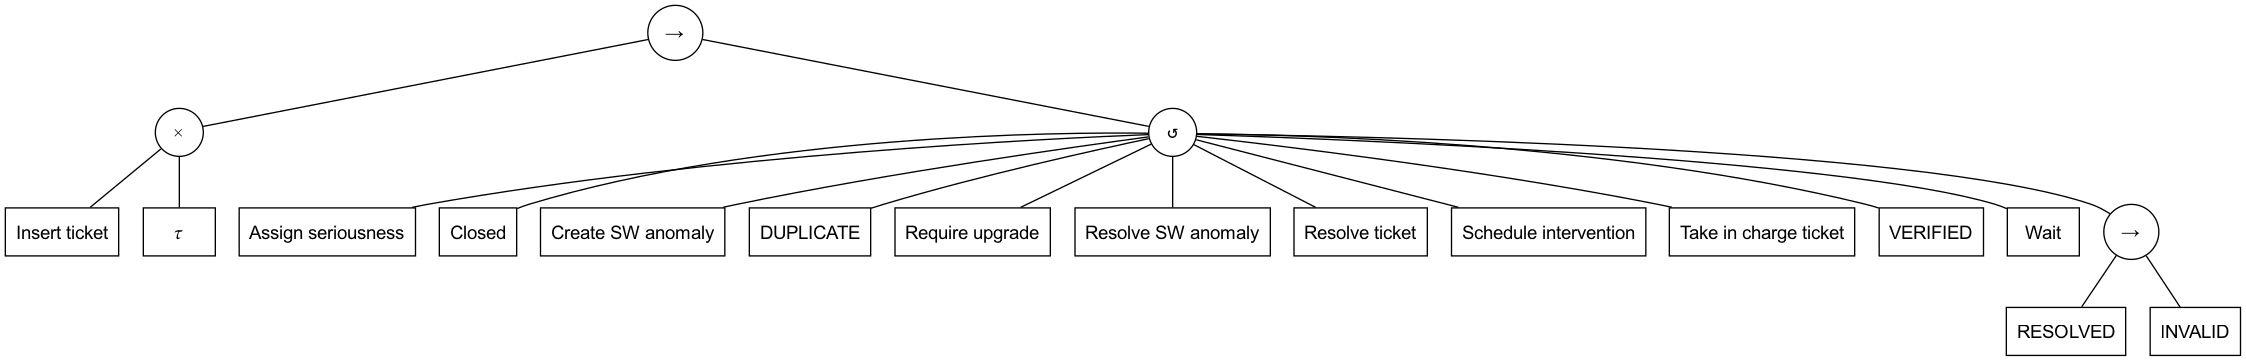

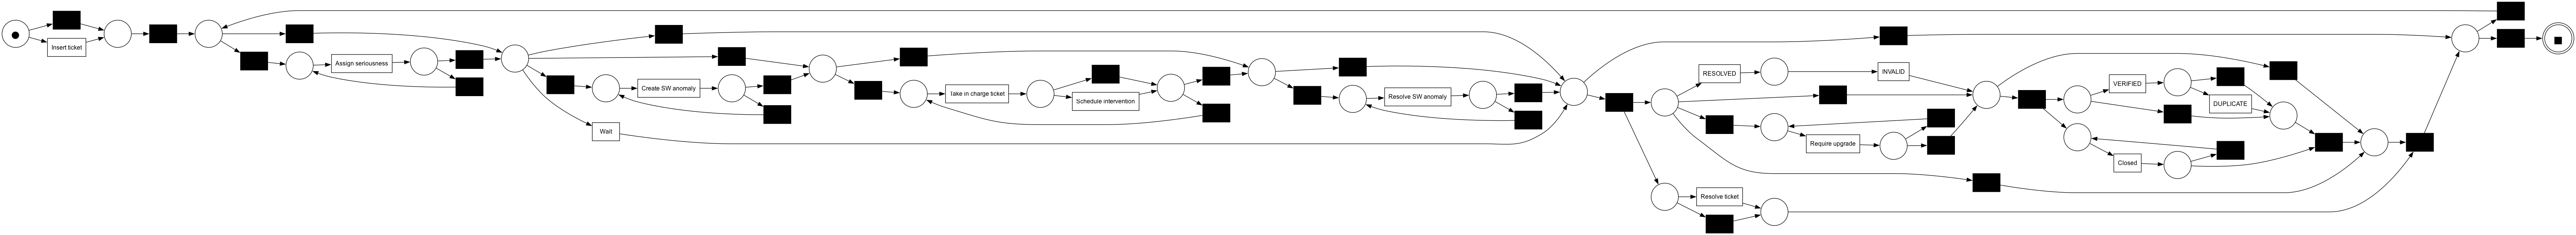

In [69]:
run_infrequent('../shared/example_files/helpdesk_log.csv', 0.9)